In [ ]:
import operator

from sklearn import linear_model, metrics, datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from itertools import islice

# TODO START

**load_digits** - dataset изображений рукописных цифр
* `Строка/Объект` - изображение `цифр`
* `Столбцы` - это `пиксели`
* `Значения` в столбцах - `яркость` пикселей
* `Картинка` - `2-х мерный` массив чисел `8 х 8`
    * каждая `ячейка` массива = `один пиксель`
    *  значение в `ячейке` = `яркость` этого `пикселя` (обычно от `0 до 1` или от `0 до 255`)

In [ ]:
# TODO достаём dataset, load_digits - изображение 8х8 развёрнутое в вектор (1, 64)

data_digit = load_digits()

data = datasets.load_digits()
image = data.images.reshape(data.images.shape[0], -1)  # data преобразованная из матрицы в вектор признаков

print('Матрица : \n', data.images[0])
print('Вектор : \n', image[0])

# TODO transform в DF
df = pd.DataFrame(data=data.data, columns=data.feature_names)

print('Содержание load_digits : \n', data.keys())

# TODO Целевая и признаки
print(data.target.shape)
print(data.data.shape)

# TODO распаковка изображения из строки в матрицу
imgs = image.reshape(image.shape[0], 8, 8)

# print(imgs[:1].reshape(8, 8))

# plt.imshow(imgs[:1].reshape(8, 8))

# TODO кол-во уникальных значений в target
# data['target']
print('Уникальные значения target : \n', np.unique(data.target))

print('Максимальное значение яркости пикселя : ', np.max(data.data))



**plt в цикле**

*в imshow подаём матрицу*
* `subplots` - должен быть `вне цикла`, 
* выводим 2 картинки

In [ ]:
# TODO plt в цикле, subplots - должен быть вне цикла, выводим 3 картинки

fig, axes = plt.subplots(1, 2, figsize=(3, 3))
for n, img in enumerate(imgs[:2]):
    print(img)
    axes[n].imshow(img, cmap=plt.cm.binary)

plt.tight_layout()  # Обрезка картинки под размеры графика 
plt.show()

print(imgs[:2].shape)

**Вывод заданного числа картинок** 

In [ ]:
# TODO вывод заданного кол-ва объектов

m = 15
fig, axes = plt.subplots(1, m, figsize=(20, 20))
for k, img in enumerate(imgs[:m]):
    axes[k].imshow(img, cmap=plt.cm.binary)
plt.tight_layout()
plt.show()

**Вывод из load_digits нескольких изображений заданной цифр**

In [ ]:
# TODO вывод заданных чисел

num_image = 100  # Число объектов из которых извлечём изображения чисел
ln = 10 # Длина разбиения объектов датасета от 0 до 9
idx = 3  # Число которое выводим, по факту Индекс Значения из разбитых на отрезки объектов
val = imgs[:num_image]  #  Часть data для отображения
subplt = int(len(val) / ln)  # Число выводимых картинок, количество столбцов в subplots
fig, axes = plt.subplots(1, subplt, figsize=(10, 10))
for n in range(0, len(val), ln):
    ax = int(n / ln)
    imgs_part = imgs[:num_image][n: n + ln][idx]
    axes[ax].imshow(imgs_part, cmap=plt.cm.binary)

plt.show()


**fit & predict**
* В мо
* `X_train` и `X_test` по `0,5` так как `мало` данных
* Что бы `оценить` качество берём `по больше` для `X_test`

In [20]:
# TODO разделение + fit + predict

# data = datasets.load_digits()

X, y = data.data, data.target

# X, y = data_digit["data"], data_digit["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
# data['target']
print(X.shape)
print(X_train.shape, X_test.shape)

model = KNeighborsClassifier(n_neighbors=5, algorithm='brute', weights='distance')
# model = KNeighborsClassifier(algorithm='brute')

model.fit(X_train, y_train)

# y_pred = model.predict(X[201:202])  # Предсказание объекта 201

# print('Предсказание объекта 201 : ', y_pred)

y_pred = model.predict(X_test)
print(f'Предсказания для  {y_pred.shape[0]} объектов X_test')
print('Первые 10 predict : ', y_pred[:10])


# TODO predict_proba
# y_prob = model.predict_proba(X)
# print(y_prob[:10])


# dfy = pd.DataFrame(y_pred)


# print(dfy.value_counts())

(1797, 64)
(898, 64) (899, 64)
Предсказания для  899 объектов X_test
Первые 10 predict :  [6 9 3 7 2 1 5 2 5 2]


**Метрики качества KNN**

In [21]:
# TODO Метрики качества KNN, возвращает таблицу

target_names = [f'class {i}' for i in list(range(10))]
labels = [j for j in range(0, 100, 10)]
print(classification_report(y_test, y_pred, target_names=target_names))

# TODO возвращает словарь 1
report_dict = classification_report(y_test, y_pred, output_dict=True)

# TODO выводим срез словаря
print(list(islice(report_dict.items(), 3))) # Срез Словаря



              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99        82
     class 1       0.97      1.00      0.98        89
     class 2       1.00      1.00      1.00        83
     class 3       0.99      0.95      0.97        93
     class 4       0.99      1.00      0.99        93
     class 5       0.99      0.96      0.97        99
     class 6       0.99      0.99      0.99        98
     class 7       0.97      1.00      0.98        87
     class 8       0.95      0.94      0.95        83
     class 9       0.96      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

[('0', {'precision': 0.9879518072289156, 'recall': 1.0, 'f1-score': 0.993939393939394, 'support': 82.0}), ('1', {'precision': 0.967391304347826, 'recall': 1.0, 'f1-score': 0.9834254143646408, 'support': 89.0}), ('2', {'precision': 1.0, 'reca

**Испортим качество для отслеживания метрик**

In [ ]:
model = KNeighborsClassifier(n_neighbors=500, algorithm='brute')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


**Матрица ошибок - confusion matrix**

[[82  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0 88  0  0  0  2  3  0]
 [ 0  0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0  0 95  1  0  0  3]
 [ 1  0  0  0  0  0 97  0  0  0]
 [ 0  0  0  0  0  0  0 87  0  0]
 [ 0  3  0  0  0  0  0  1 78  1]
 [ 0  0  0  1  1  1  0  0  1 88]]


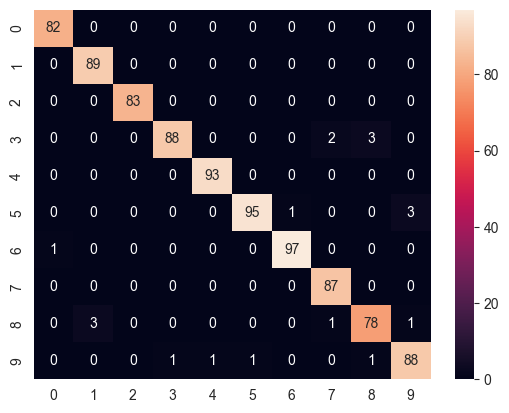

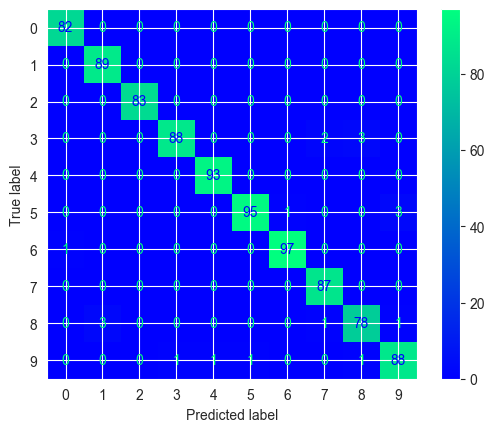

In [22]:
# TODO Матрица ошибок - confusion matrix

conf_mtx = confusion_matrix(y_test, y_pred)

#  TODO Предаём матрицу ошибок для визуализации
display = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)

print(conf_mtx)

# TODO строим с seaborn
sns.heatmap(conf_mtx, annot=True)
plt.show()
# TODO строим с plt

fig, ax = plt.subplots()
display.plot(ax=ax, xticks_rotation='horizontal', cmap='winter')
plt.show()


**f1-score и macro avg Считаем Руками**

In [24]:
# TODO  f1-score и macro avg Считаем Руками
from itertools import islice
from operator import itemgetter


report_dict = classification_report(y_test, y_pred, output_dict=True) # Возвращает словарь



# for i in list(report_dict)[:-3]:
#     # prsc, rcll = itemgetter('precision','recall')(report_dict[i])
#     prsc, rcll = report_dict[i]['precision'], report_dict[i]['recall']
# 
#     print(prsc, rcll)

# 
# TODO вытаскиваем ключи  'precision' и 'recall', преобразуем в строку

classes = map(str, np.unique(data.target))

for i in classes:
    prsc, rcll = report_dict[i]['precision'], report_dict[i]['recall']
    
    print(prsc, rcll)
    '''Гармоническое среднее'''
    # f_1 = (prsc * rcll) / (prsc + rcll)
    # 
    # print(f_1)

0.9879518072289156 1.0
0.967391304347826 1.0
1.0 1.0
0.9887640449438202 0.946236559139785
0.9893617021276596 1.0
0.9895833333333334 0.9595959595959596
0.9897959183673469 0.9897959183673469
0.9666666666666667 1.0
0.9512195121951219 0.9397590361445783
0.9565217391304348 0.9565217391304348
